In [4]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import squarify

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False

In [52]:
from matplotlib import font_manager, rc
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family = font_name)

# 데이터 불러오기

In [8]:
df_ncs = pd.read_excel('ncs_original.xlsx',encoding='cp949')
df_ncs.head()

,대분류,중분류,소분류,세분류,능력단위,능력단위요소
0,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 개발전략수립,협력대상국 개발환경 분석하기
1,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 개발전략수립,자국협력환경 분석하기
2,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 개발전략수립,협력대상국 지원전략 수립하기
3,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 사업기획,협력대상국 개발전략 분석하기
4,사업관리,사업관리,프로젝트 관리,공적개발원조 사업관리,공적개발원조사업 사업기획,사업타당성 조사하기


# 대분류별 능력단위 개수 시각화

In [110]:
df = pd.DataFrame(df_ncs['대분류'].value_counts())
df

,대분류
기계,5303
건설,4957
전기·전자,3549
정보통신,2827
문화·예술·디자인·방송,2361
이용·숙박·여행·오락·스포츠,2331
환경·에너지·안전,2210
농림어업,2173
재료,1754
화학,1733


In [111]:
#cmap = matplotlib.cm.summer_r
cmap = matplotlib.cm.get_cmap('Pastel1')    # 값이 클 수록 진한 빨간색을 가지는 컬러맵
minimum=df['대분류'].min()
maximum=df['대분류'].max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)   # 최소값, 최대값으로 정규화 하기
color_list = [cmap(norm(value)) for value in df['대분류']]       # 컬러 표현값으로 변경하기
#color_list

## 아래는 color_list 에 들어가는 값입니다
# [(0.403921568627451, 0.0, 0.05098039215686274, 1.0),
# (0.4344329104190696, 0.007381776239907725, 0.054917339484813525, 1.0),
# (0.9344867358708189, 0.2286812764321415, 0.17139561707035755, 1.0),
# (1.0, 0.9607843137254902, 0.9411764705882353, 1.0)]

In [112]:
plt.rcParams['font.size'] = 23

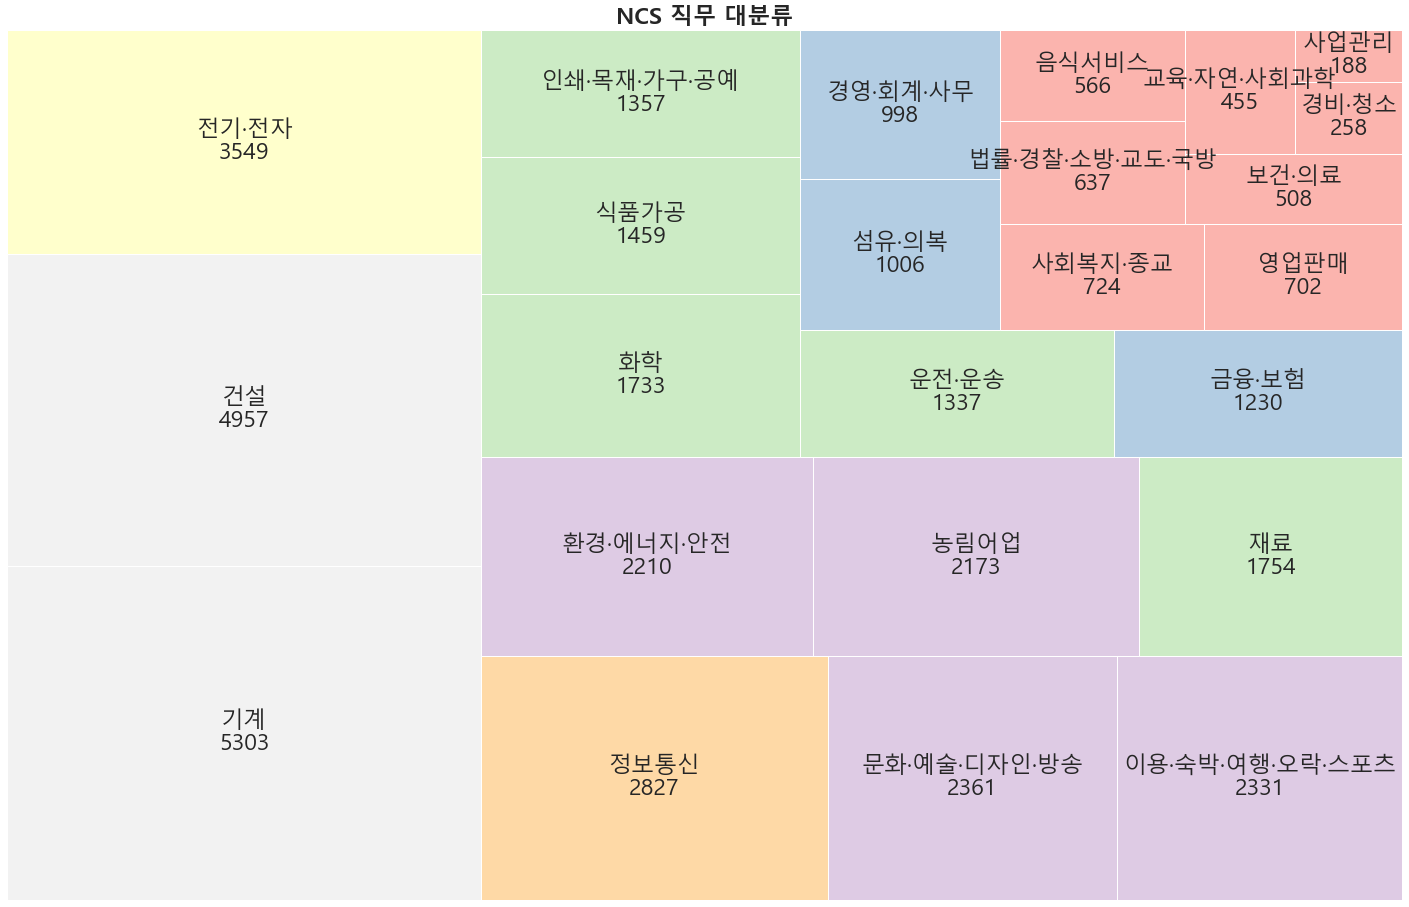

<Figure size 432x288 with 0 Axes>

In [113]:
plt.figure(figsize=(25,16)); plt.axis('off')
squarify.plot(sizes=df['대분류'], label = df.index, value = df['대분류'], color = color_list, alpha=1)
plt.title("NCS 직무 대분류",fontsize=23,fontweight="bold")
plt.show()
plt.savefig('treemap.png',bbox_inches='tight')

# 대분류별 세분류 개수 시각화

In [81]:
df1 = df_ncs[['대분류','세분류']]
df1.drop_duplicates(inplace=True)

,대분류,세분류
0,사업관리,공적개발원조 사업관리
1,사업관리,공적개발원조 사업관리
2,사업관리,공적개발원조 사업관리
3,사업관리,공적개발원조 사업관리
4,사업관리,공적개발원조 사업관리
...,...,...
40618,농림어업,어업환경개선
40619,농림어업,어업환경개선
40620,농림어업,어업환경개선
40621,농림어업,어업환경개선


In [86]:
df1

,대분류,세분류
0,사업관리,공적개발원조 사업관리
26,사업관리,프로젝트 관리
71,사업관리,산학협력관리
119,사업관리,해외법인설립관리
150,사업관리,해외취업관리
...,...,...
40418,농림어업,수산질병관리
40464,농림어업,염생산
40498,농림어업,어촌체험상품개발
40539,농림어업,어촌체험시설운영


In [116]:
df = pd.DataFrame(df1['대분류'].value_counts())

In [117]:
#cmap = matplotlib.get_cmap("Set3")
cmap = matplotlib.cm.get_cmap('Pastel1')    # 값이 클 수록 진한 빨간색을 가지는 컬러맵
minimum=df['대분류'].min()
maximum=df['대분류'].max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)   # 최소값, 최대값으로 정규화 하기
color_list = [cmap(norm(value)) for value in df['대분류']]       # 컬러 표현값으로 변경하기
#color_list

## 아래는 color_list 에 들어가는 값입니다
# [(0.403921568627451, 0.0, 0.05098039215686274, 1.0),
# (0.4344329104190696, 0.007381776239907725, 0.054917339484813525, 1.0),
# (0.9344867358708189, 0.2286812764321415, 0.17139561707035755, 1.0),
# (1.0, 0.9607843137254902, 0.9411764705882353, 1.0)]

In [118]:
plt.rcParams['font.size'] = 23

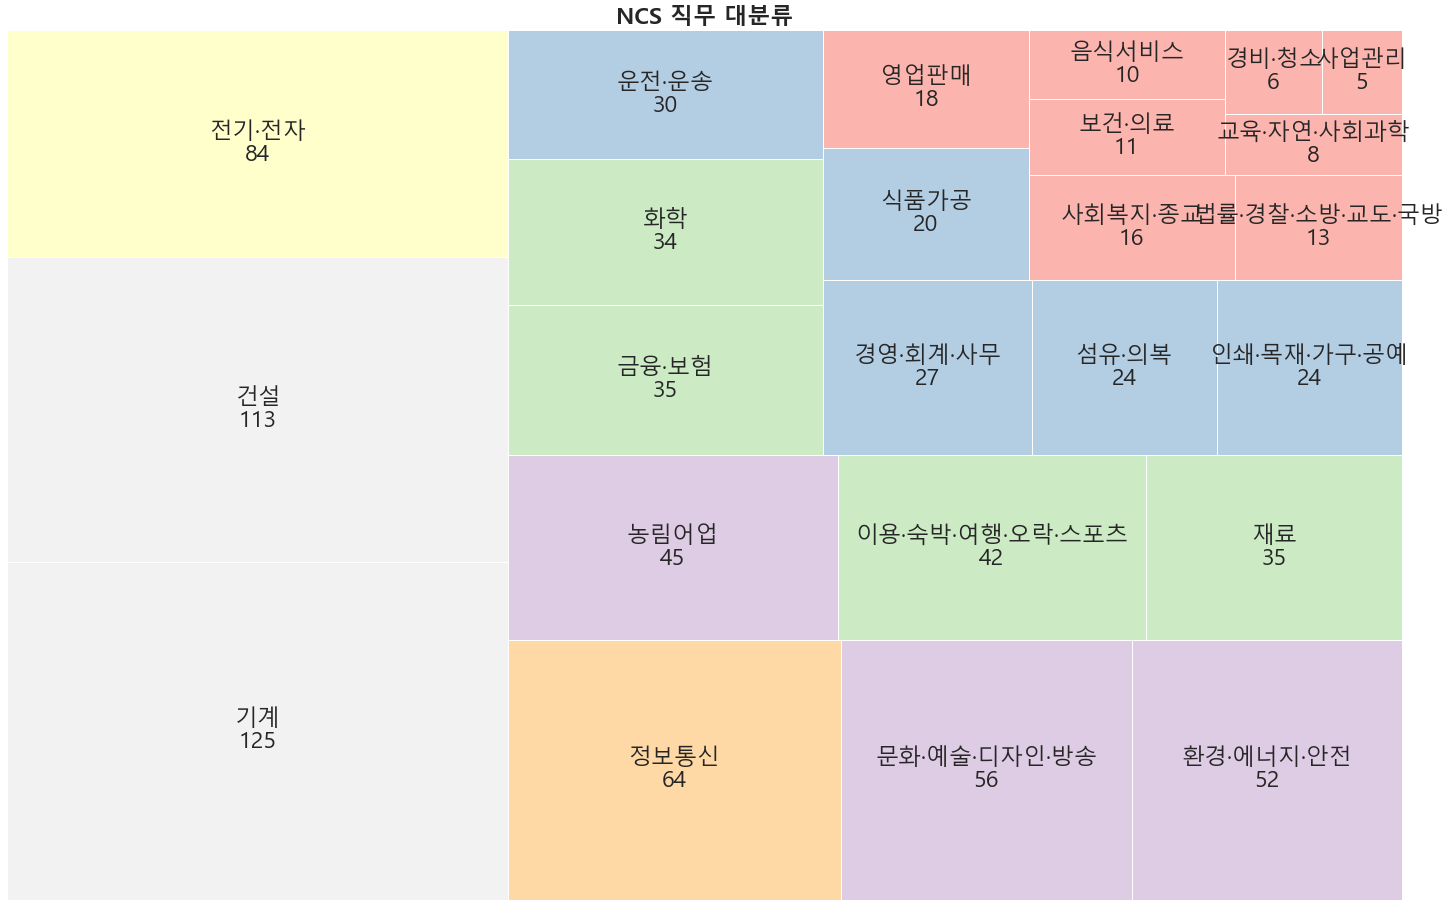

<Figure size 432x288 with 0 Axes>

In [122]:
plt.figure(figsize=(25,16)); plt.axis('off')
squarify.plot(sizes=df['대분류'], label = df.index, value = df['대분류'], color = color_list, )
plt.title("NCS 직무 대분류",fontsize=23,fontweight="bold")
plt.show()
plt.savefig('treemap.png',bbox_inches='tight')